In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from src.utils import GAESMLP, splitDataset, scatter_data

### Data loading & splitting

In [3]:
classes = pd.read_csv("data/classes.csv", header=None)
moons = pd.read_csv("data/moons.csv", header=None)
circles = pd.read_csv("data/circles.csv", header=None)

In [4]:
df_classes = splitDataset(classes.iloc[:,:-1].values, classes.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])
df_moons = splitDataset(moons.iloc[:,:-1].values, moons.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])
df_circles = splitDataset(circles.iloc[:,:-1].values, circles.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])

### Data Visualization

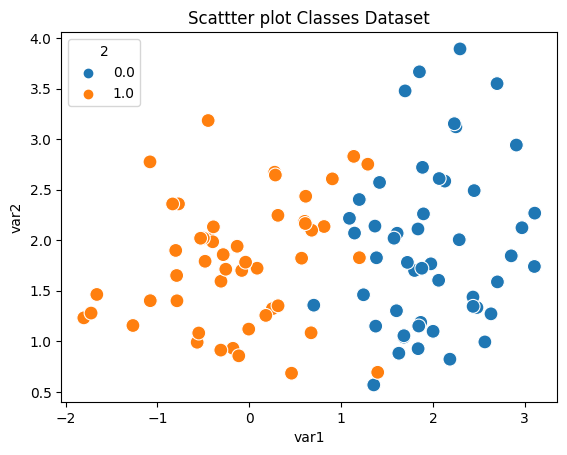

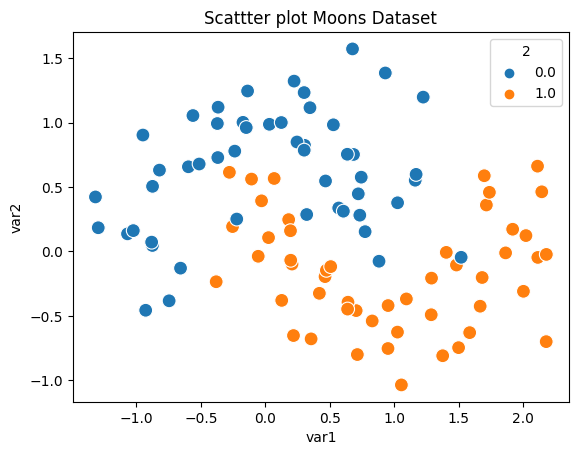

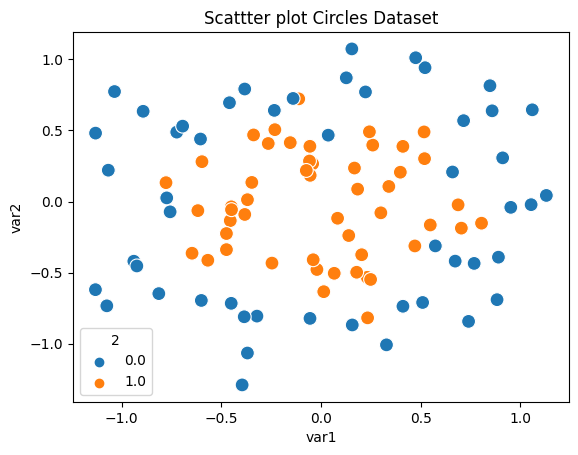

In [5]:
#Plotting the syntetic initial datasets, with an increasing complexity
scatter_data(classes, var1='var1', var2='var2', datasetName='Classes')
scatter_data(moons, var1='var1', var2='var2', datasetName='Moons')
scatter_data(circles, var1='var1', var2='var2', datasetName='Circles')

## Experiments

In [6]:
# fixing the MLP architecture
model = [2,4,4,1]

### MLP + Evolutionary Strategy

iter 10. reward: 1.450724
iter 20. reward: 3.119396
iter 30. reward: 18.042158
iter 40. reward: 6.093141
iter 50. reward: 19.020877
iter 60. reward: 12.009264
iter 70. reward: 5.372560
iter 80. reward: 10.167639
iter 90. reward: 12.835202
iter 100. reward: 11.194269


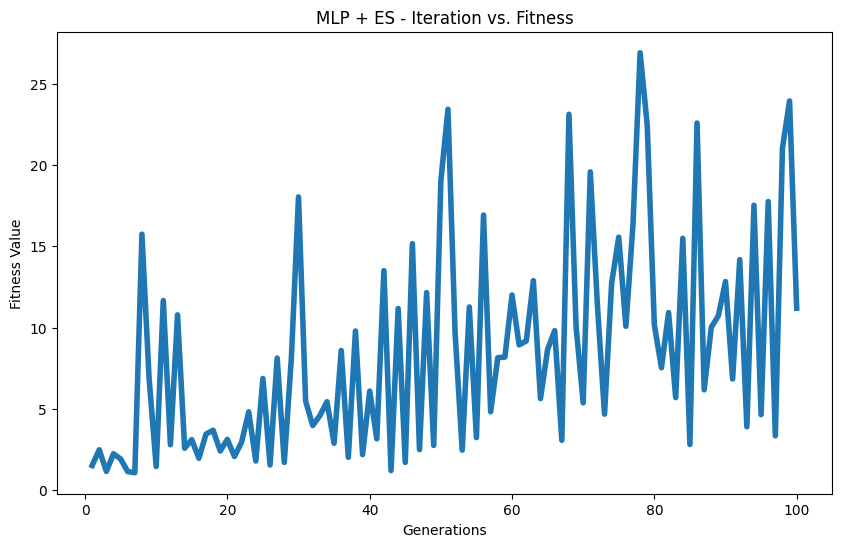

Train loss: 7.6915106773376465         Train acc:  0.9571428571428572
Validation loss: 7.726778984069824    Validation acc:  0.9333333333333333
313/313 [==============================] - 0s 1ms/step


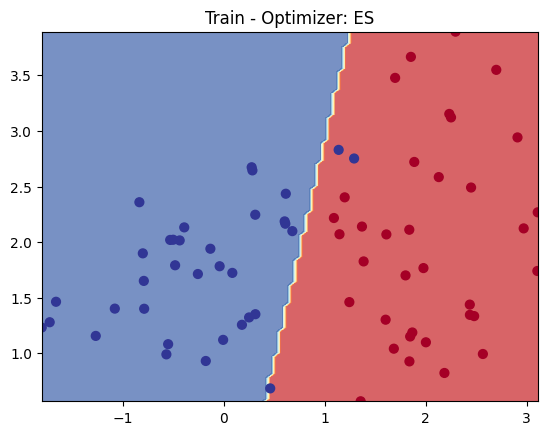

313/313 [==============================] - 0s 1ms/step


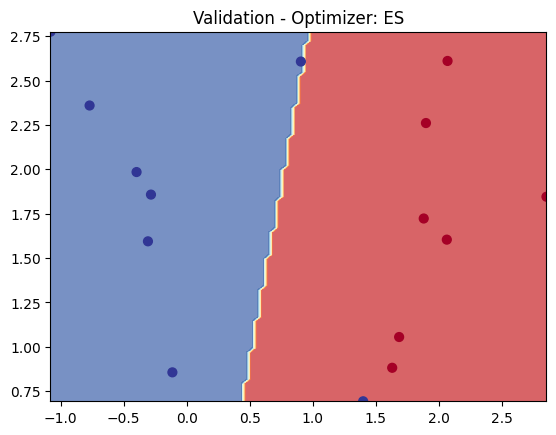

313/313 [==============================] - 0s 1ms/step


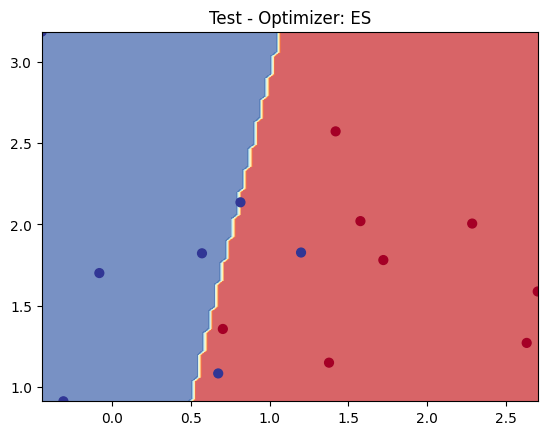

(0.8, 7.4594874)

In [7]:
# Classes Dataset
es = GAESMLP(model, 'ES', pop_size=40,sigma=0.2,learning_rate=0.3,decay=0.995,num_threads=1, save_dir='results/es_classes')
es.fit(df_classes['X_train'], df_classes['y_train'], X_val=df_classes['X_val'], y_val=df_classes['y_val'], X_test=df_classes['X_test'], y_test=df_classes['y_test'], verbose=True)
es.evaluate(df_classes['X_test'], df_classes['y_test'], verbose='Test')

iter 10. reward: 1.899794
iter 20. reward: 1.989986
iter 30. reward: 2.230605
iter 40. reward: 2.288277
iter 50. reward: 2.944278
iter 60. reward: 3.010817
iter 70. reward: 2.650902
iter 80. reward: 3.542442
iter 90. reward: 2.844907
iter 100. reward: 3.899533
iter 110. reward: 5.677631
iter 120. reward: 5.059733
iter 130. reward: 3.972769
iter 140. reward: 5.819435
iter 150. reward: 4.163398


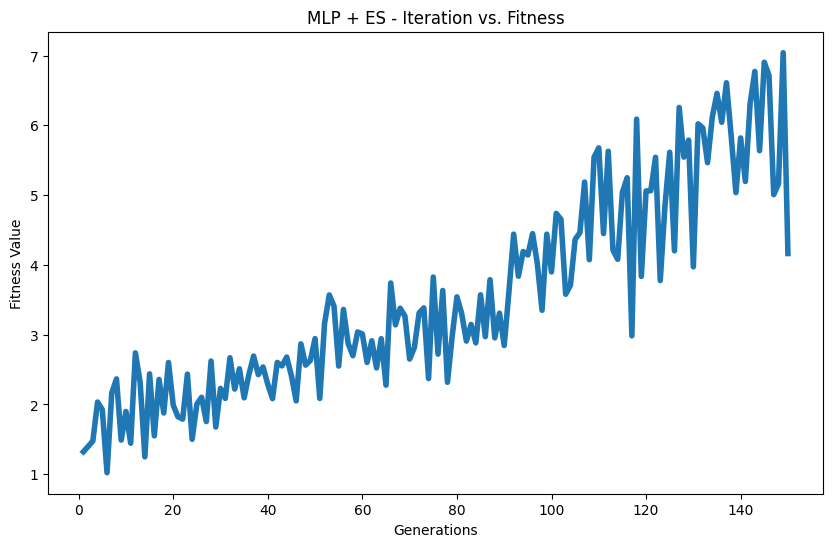

Train loss: 7.685616493225098         Train acc:  0.9142857142857143
Validation loss: 7.5839619636535645    Validation acc:  0.9333333333333333
313/313 [==============================] - 0s 1ms/step


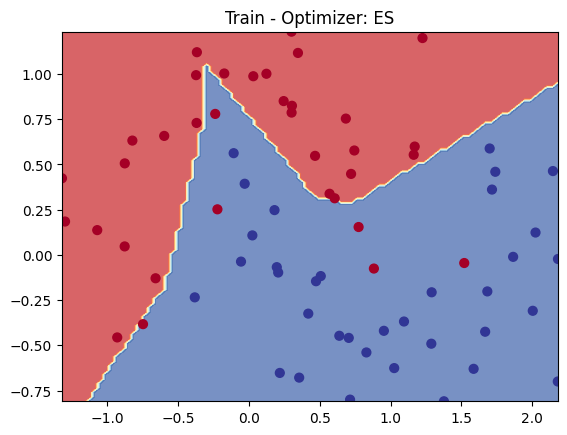

313/313 [==============================] - 0s 2ms/step


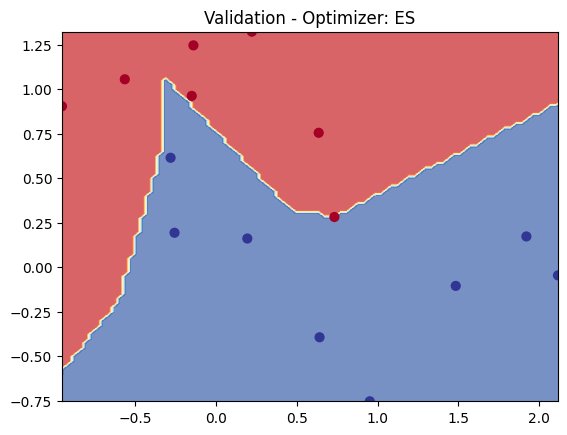

313/313 [==============================] - 0s 1ms/step


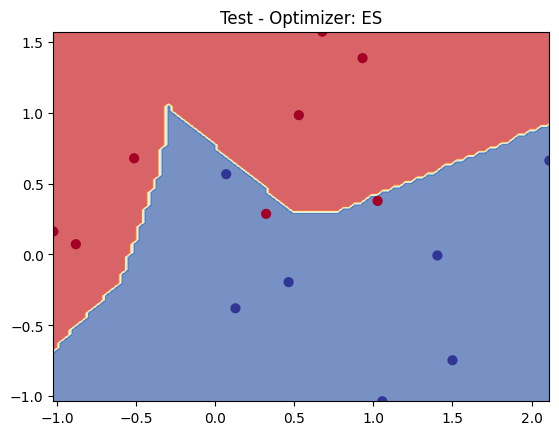

(0.8666666666666667, 7.7859607)

In [8]:
# Moons datset
es = GAESMLP(model, 'ES',pop_size=40,sigma=0.2,learning_rate=0.3,decay=0.995,num_threads=1, save_dir='results/es_moons')
es.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], X_test=df_moons['X_test'], y_test=df_moons['y_test'], verbose=True, iterations=150)
es.evaluate(df_moons['X_test'], df_moons['y_test'], verbose='Test')

iter 10. reward: 1.541267
iter 20. reward: 1.012253
iter 30. reward: 2.933750
iter 40. reward: 1.939659
iter 50. reward: 2.408033
iter 60. reward: 2.051475
iter 70. reward: 3.359712
iter 80. reward: 3.670340
iter 90. reward: 2.265478
iter 100. reward: 2.100478
iter 110. reward: 3.107197
iter 120. reward: 3.430635
iter 130. reward: 3.936985
iter 140. reward: 4.891054
iter 150. reward: 4.054033
iter 160. reward: 6.015735
iter 170. reward: 4.502785
iter 180. reward: 4.390141
iter 190. reward: 5.728561
iter 200. reward: 5.981738


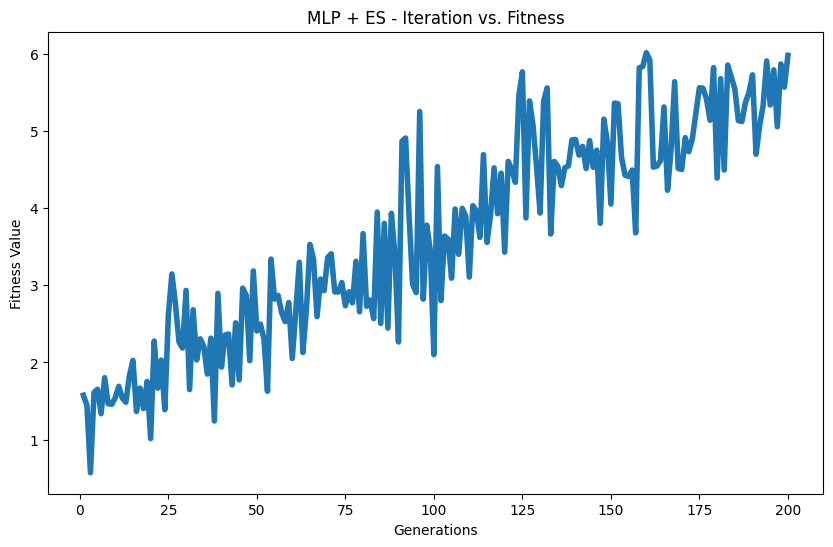

Train loss: 7.688891410827637         Train acc:  0.9285714285714286
Validation loss: 7.720666408538818    Validation acc:  0.9333333333333333
313/313 [==============================] - 1s 2ms/step


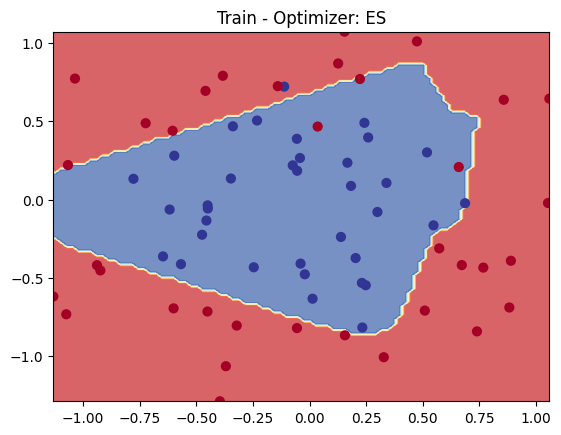

313/313 [==============================] - 1s 2ms/step


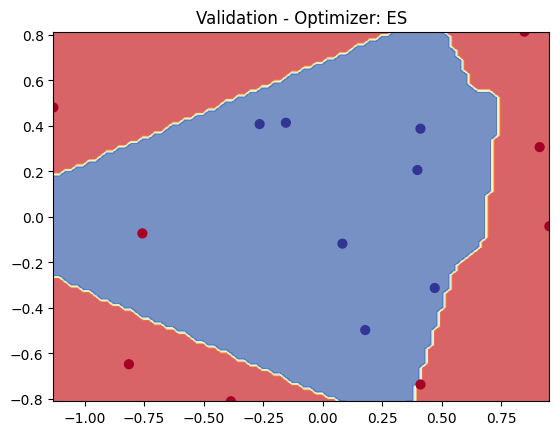

313/313 [==============================] - 1s 2ms/step


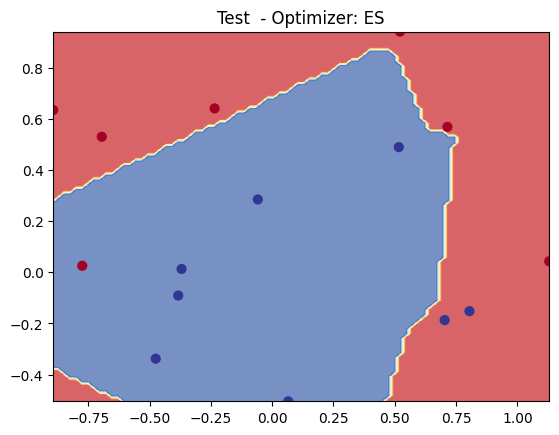

(0.8, 7.7267804)

In [9]:
# Circles dataset
es = GAESMLP(model, 'ES',pop_size=40,sigma=0.2,learning_rate=0.3,decay=0.995,num_threads=1, save_dir='results/es_circles')
es.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_circles['y_val'], X_test=df_circles['X_test'], y_test=df_circles['y_test'], verbose=True, iterations=200)
es.evaluate(df_circles['X_test'], df_circles['y_test'], verbose = 'Test ')

### MLP + Genetic Algorithm

Generation = 1
Fitness    = 1.8364708875316769
Generation = 2
Fitness    = 1.9012566900406749
Generation = 3
Fitness    = 1.9012566900406749
Generation = 4
Fitness    = 2.4413971926841853
Generation = 5
Fitness    = 2.4413971926841853
Generation = 6
Fitness    = 2.4413971926841853
Generation = 7
Fitness    = 3.3802585788824935
Generation = 8
Fitness    = 3.3802585788824935
Generation = 9
Fitness    = 4.292330453233642
Generation = 10
Fitness    = 4.292330453233642
Generation = 11
Fitness    = 4.642120462319446
Generation = 12
Fitness    = 4.936263720216377
Generation = 13
Fitness    = 4.936263720216377
Generation = 14
Fitness    = 4.936263720216377
Generation = 15
Fitness    = 4.936263720216377
Generation = 16
Fitness    = 5.74938576152148
Generation = 17
Fitness    = 5.74938576152148
Generation = 18
Fitness    = 6.1598962067083365
Generation = 19
Fitness    = 6.1598962067083365
Generation = 20
Fitness    = 6.1598962067083365
Generation = 21
Fitness    = 6.1598962067083365
Generation =

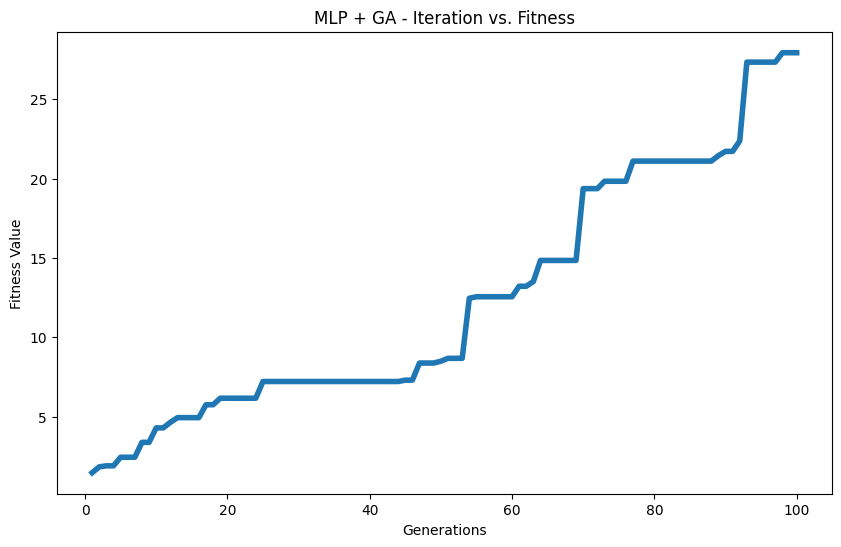

Train loss: 7.690201282501221         Train acc:  0.9857142857142858
Validation loss: 7.726778984069824    Validation acc:  0.9333333333333333
313/313 [==============================] - 1s 2ms/step


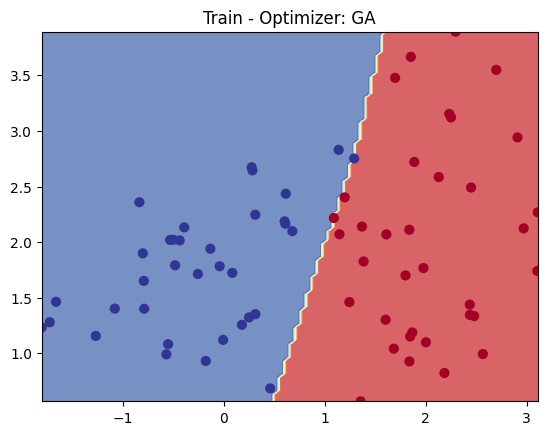

313/313 [==============================] - 0s 1ms/step


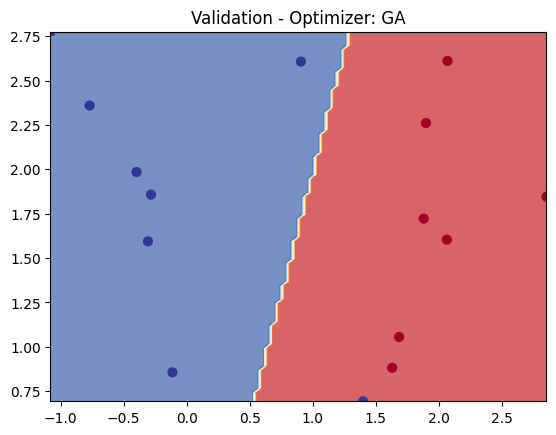

(0.8666666666666667, 7.655371)

In [10]:
# Classes dataset
ga = GAESMLP(model, 'GA', num_solutions=10, num_parents_mating=5, save_dir='results/ga_classes')
ga.fit(df_classes['X_train'], df_classes['y_train'], X_val=df_classes['X_val'], y_val=df_classes['y_val'], X_test=df_classes['X_test'], y_test=df_classes['y_test'], verbose=True)
ga.evaluate(df_classes['X_test'], df_classes['y_test'])

Generation = 1
Fitness    = 1.931873648760636
Generation = 2
Fitness    = 1.931873648760636
Generation = 3
Fitness    = 1.9783113345976855
Generation = 4
Fitness    = 2.348185943094456
Generation = 5
Fitness    = 2.348185943094456
Generation = 6
Fitness    = 2.3727727929766127
Generation = 7
Fitness    = 2.3727727929766127
Generation = 8
Fitness    = 2.4107304210305975
Generation = 9
Fitness    = 2.556017662479957
Generation = 10
Fitness    = 2.556017662479957
Generation = 11
Fitness    = 2.556017662479957
Generation = 12
Fitness    = 2.6815450868612194
Generation = 13
Fitness    = 2.6815450868612194
Generation = 14
Fitness    = 2.6815450868612194
Generation = 15
Fitness    = 2.6815450868612194
Generation = 16
Fitness    = 2.6815450868612194
Generation = 17
Fitness    = 2.7628915571113435
Generation = 18
Fitness    = 2.7628915571113435
Generation = 19
Fitness    = 2.8671575684195942
Generation = 20
Fitness    = 2.904674005332739
Generation = 21
Fitness    = 2.9853089701089064
Generatio

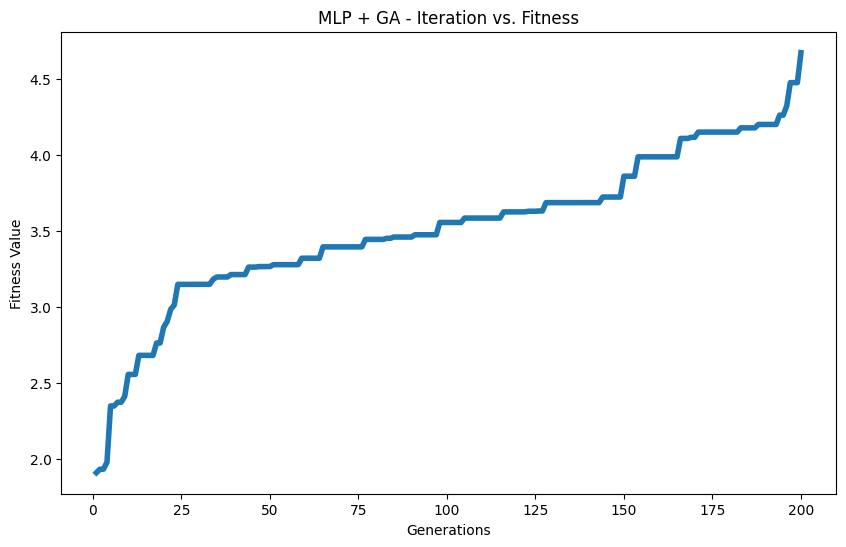

Train loss: 7.692167282104492         Train acc:  0.9142857142857143
Validation loss: 7.869596481323242    Validation acc:  0.8
313/313 [==============================] - 1s 2ms/step


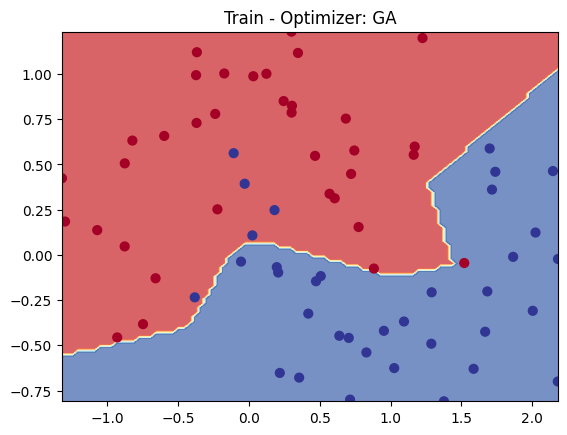

313/313 [==============================] - 1s 2ms/step


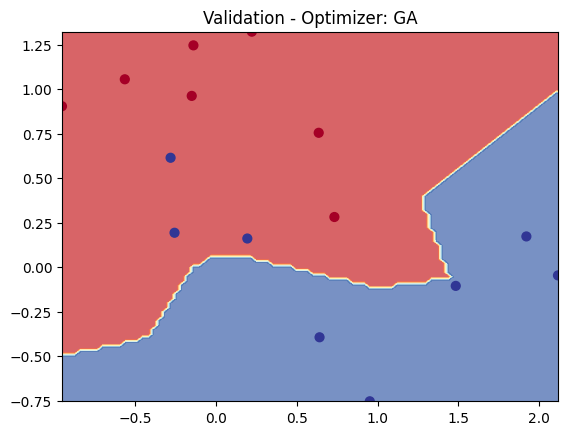

313/313 [==============================] - 1s 2ms/step


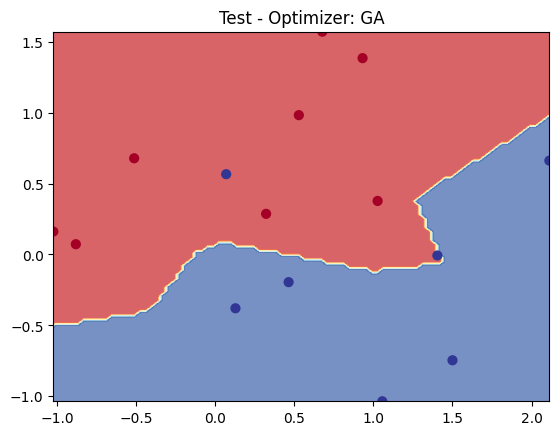

(0.8666666666666667, 7.5247817)

In [11]:
# Moons dataset
ga = GAESMLP(model, 'GA', num_solutions=10, num_parents_mating=5, save_dir='results/ga_moons')
ga.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], X_test=df_moons['X_test'], y_test=df_moons['y_test'], verbose=True, iterations=200)
ga.evaluate(df_moons['X_test'], df_moons['y_test'], 'Test')

Generation = 1
Fitness    = 1.5240690479976688
Generation = 2
Fitness    = 1.5240690479976688
Generation = 3
Fitness    = 1.57028928972482
Generation = 4
Fitness    = 1.57028928972482
Generation = 5
Fitness    = 1.5914033767260478
Generation = 6
Fitness    = 1.6541496094829211
Generation = 7
Fitness    = 1.6856405424238976
Generation = 8
Fitness    = 1.6856405424238976
Generation = 9
Fitness    = 1.6856405424238976
Generation = 10
Fitness    = 1.6856405424238976
Generation = 11
Fitness    = 1.7295469257490088
Generation = 12
Fitness    = 1.7295469257490088
Generation = 13
Fitness    = 1.7295469257490088
Generation = 14
Fitness    = 1.7295469257490088
Generation = 15
Fitness    = 1.7306252265787345
Generation = 16
Fitness    = 1.766778328835141
Generation = 17
Fitness    = 1.766778328835141
Generation = 18
Fitness    = 1.8157568585273942
Generation = 19
Fitness    = 1.8157568585273942
Generation = 20
Fitness    = 1.8157568585273942
Generation = 21
Fitness    = 1.8556701279519052
Generat

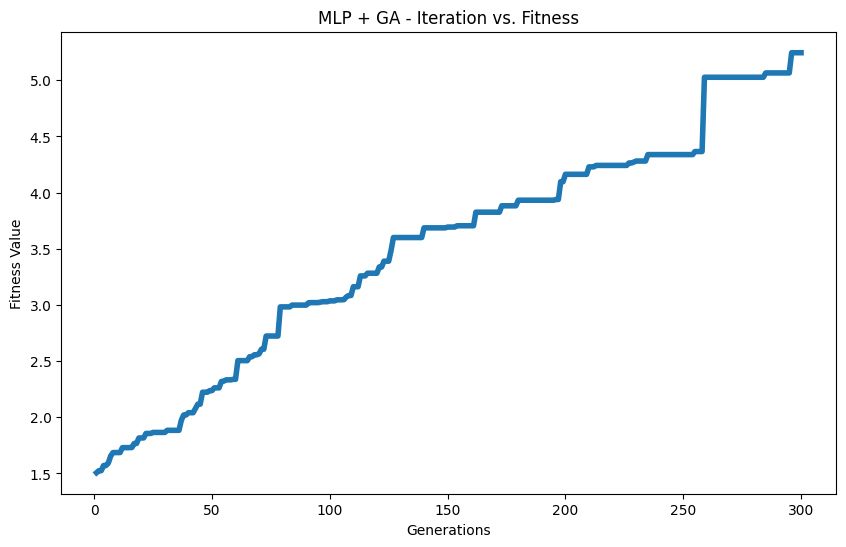

Train loss: 7.688891410827637         Train acc:  0.9285714285714286
Validation loss: 7.720666408538818    Validation acc:  0.9333333333333333
313/313 [==============================] - 1s 2ms/step


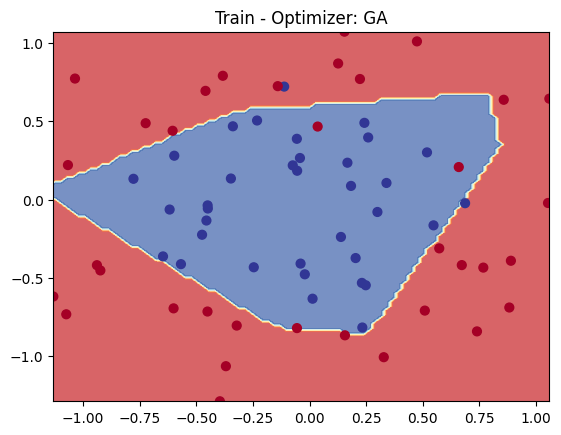

313/313 [==============================] - 1s 4ms/step


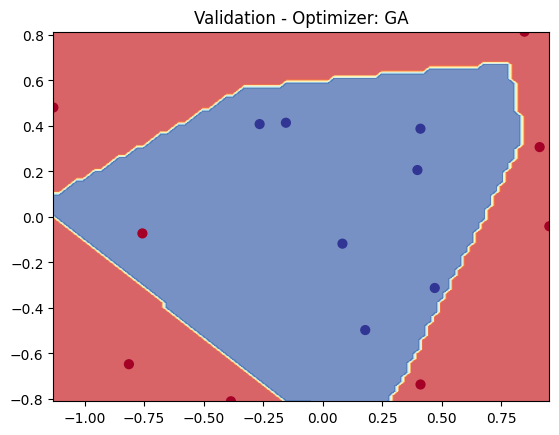

313/313 [==============================] - 1s 3ms/step


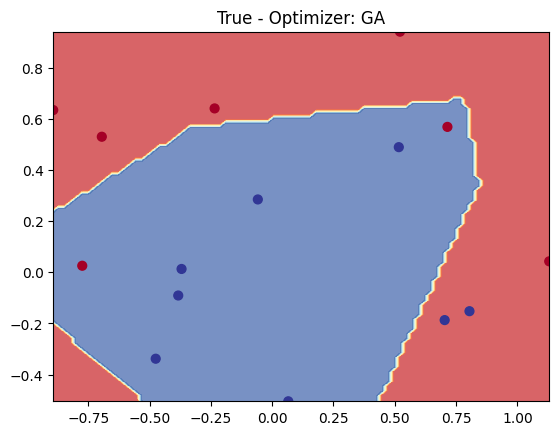

(0.7333333333333333, 7.655371)

In [12]:
# Circles dataset
ga = GAESMLP(model, 'GA', num_solutions=10, num_parents_mating=5, save_dir='results/ga_circles')
ga.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_circles['y_val'], X_test=df_circles['X_test'], y_test=df_circles['y_test'], verbose=True, iterations=300)
ga.evaluate(df_circles['X_test'], df_circles['y_test'], verbose=True)

### MLP + Backpropagation

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 0.8042 - accuracy: 0.4571
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7955 - accuracy: 0.4857
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7885 - accuracy: 0.4857
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7812 - accuracy: 0.4857
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7759 - accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7709 - accuracy: 0.4857
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7662 - accuracy: 0.4857
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7623 - accuracy: 0.5000
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7578 - accuracy: 0.4714
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7538 - accuracy: 0.4714
Epoch 11/100
3/3 [===========

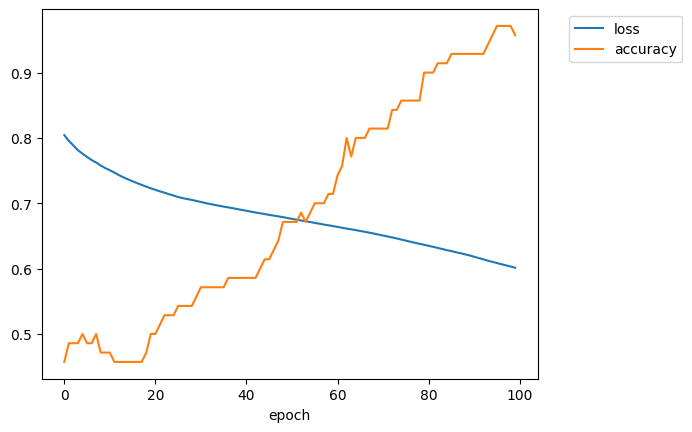

Train loss: 7.688892364501953         Train acc:  0.9571428571428572
Validation loss: 7.726778984069824    Validation acc:  0.9333333333333333
313/313 [==============================] - 1s 3ms/step


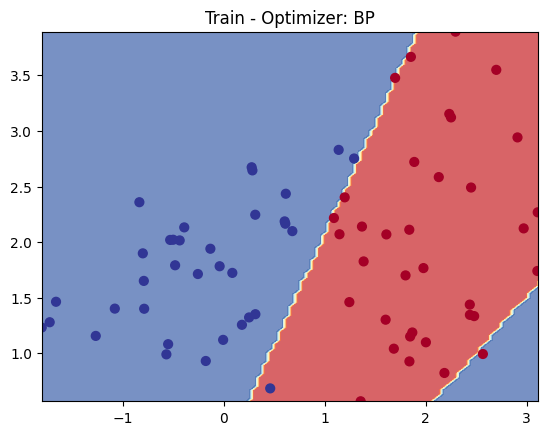

313/313 [==============================] - 1s 2ms/step


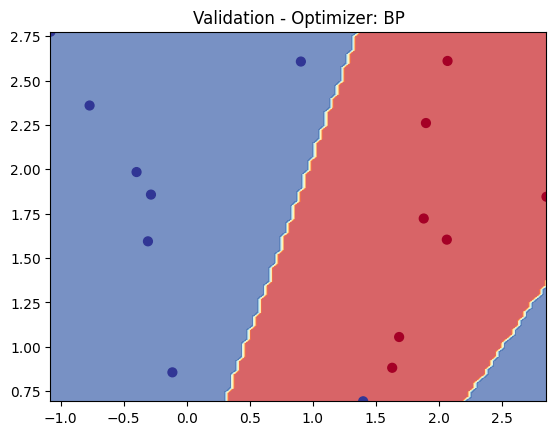

313/313 [==============================] - 1s 3ms/step


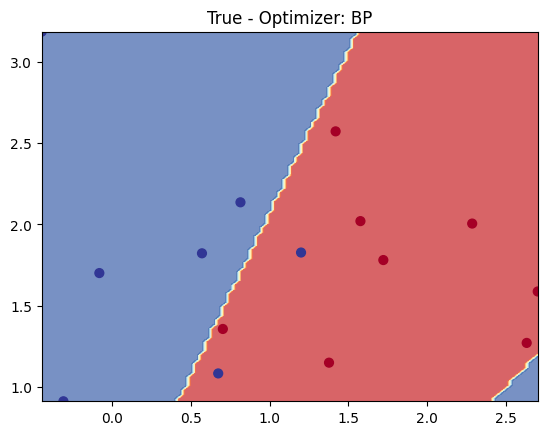

(0.8666666666666667, 7.5247817)

In [13]:
# Classes dataset
bp = GAESMLP(model, 'BP', learning_rate=0.5, momentum=0.9, nesterov=True, save_dir='results/bp_classes')
bp.fit(df_classes['X_train'], df_classes['y_train'], X_val=df_classes['X_val'], y_val=df_classes['y_val'], X_test=df_classes['X_test'], y_test=df_classes['y_test'], verbose=True)
bp.evaluate(df_classes['X_test'], df_classes['y_test'], verbose=True)

Epoch 1/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.6764 - accuracy: 0.4857
Epoch 2/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.6761 - accuracy: 0.6286
Epoch 3/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.6760 - accuracy: 0.6286
Epoch 4/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.6757 - accuracy: 0.7714
Epoch 5/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.6756 - accuracy: 0.7714
Epoch 6/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.6752 - accuracy: 0.7714
Epoch 7/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.6751 - accuracy: 0.7714
Epoch 8/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.6748 - accuracy: 0.5000
Epoch 9/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.6745 - accuracy: 0.5000
Epoch 10/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.5000
Epoch 11/2000
3/3 [

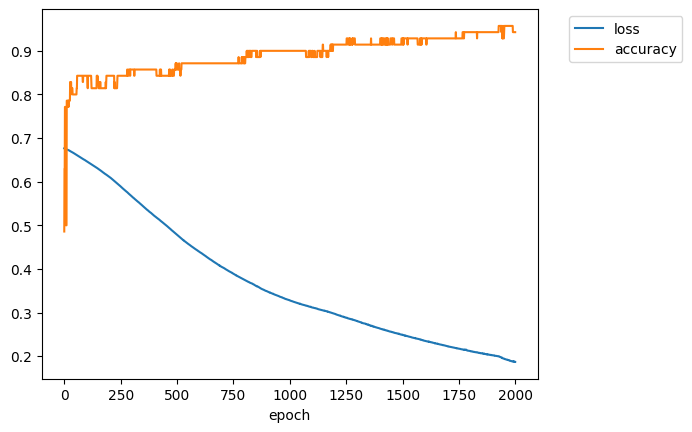

Train loss: 7.689546585083008         Train acc:  0.9428571428571428
Validation loss: 7.798188209533691    Validation acc:  0.8666666666666667
313/313 [==============================] - 0s 1ms/step


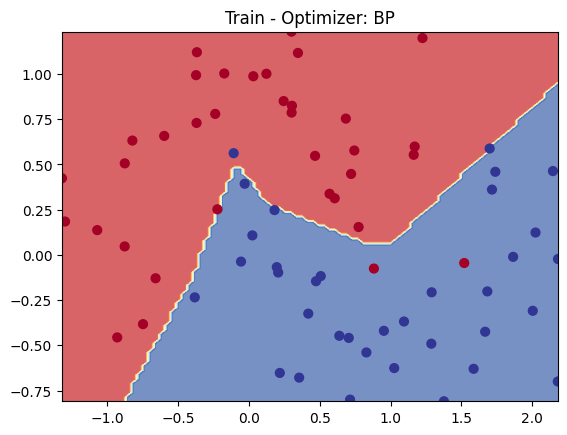

313/313 [==============================] - 1s 2ms/step


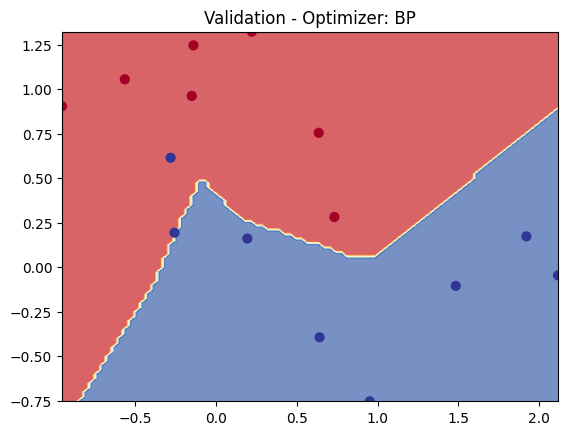

313/313 [==============================] - 1s 2ms/step


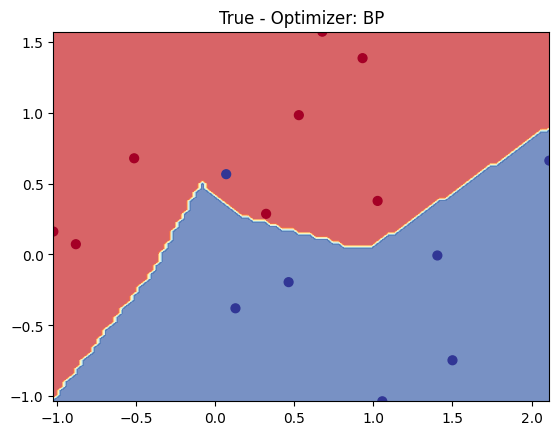

(0.9333333333333333, 7.590077)

In [14]:
# Moons dataset
bp = GAESMLP(model, 'BP', learning_rate=0.5, momentum=0.9, nesterov=True, save_dir='results/bp_moons')
bp.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], X_test=df_moons['X_test'], y_test=df_moons['y_test'], verbose=True, iterations=2000)
bp.evaluate(df_moons['X_test'], df_moons['y_test'], verbose=True)

Epoch 1/3000
3/3 [==============================] - 0s 5ms/step - loss: 0.7235 - accuracy: 0.4429
Epoch 2/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.7233 - accuracy: 0.4571
Epoch 3/3000
3/3 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.4429
Epoch 4/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.7226 - accuracy: 0.4429
Epoch 5/3000
3/3 [==============================] - 0s 0s/step - loss: 0.7219 - accuracy: 0.4429
Epoch 6/3000
3/3 [==============================] - 0s 3ms/step - loss: 0.7213 - accuracy: 0.4000
Epoch 7/3000
3/3 [==============================] - 0s 5ms/step - loss: 0.7212 - accuracy: 0.4000
Epoch 8/3000
3/3 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.4000
Epoch 9/3000
3/3 [==============================] - 0s 5ms/step - loss: 0.7204 - accuracy: 0.4143
Epoch 10/3000
3/3 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.4143
Epoch 11/3000
3/3 [=

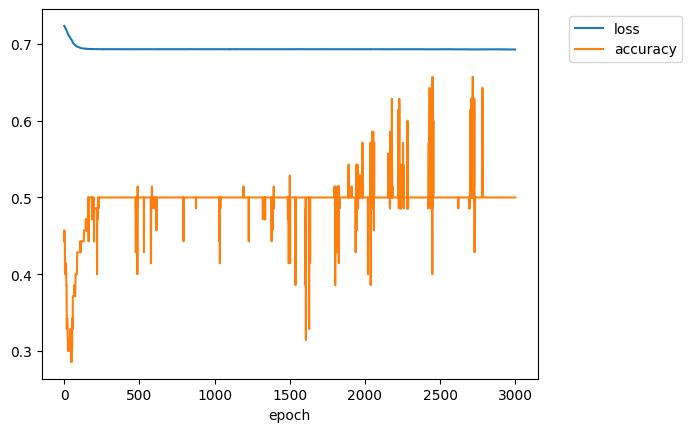

Train loss: 7.7124738693237305         Train acc:  0.5
Validation loss: 7.198308944702148    Validation acc:  0.5333333333333333
313/313 [==============================] - 0s 1ms/step


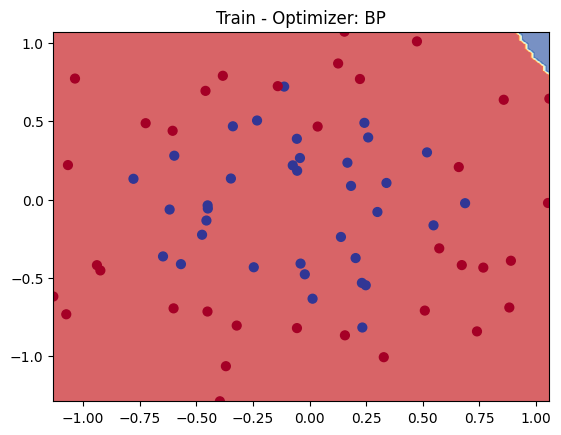

313/313 [==============================] - 1s 2ms/step


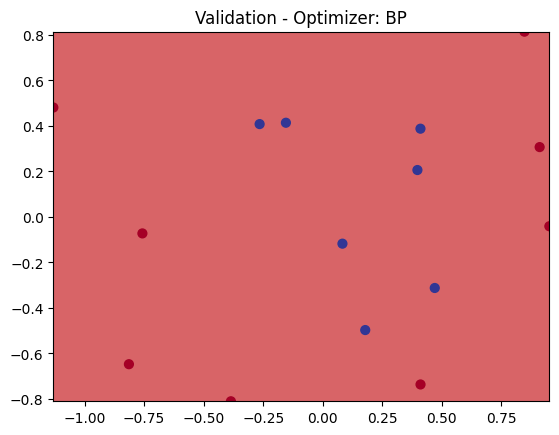

313/313 [==============================] - 1s 2ms/step


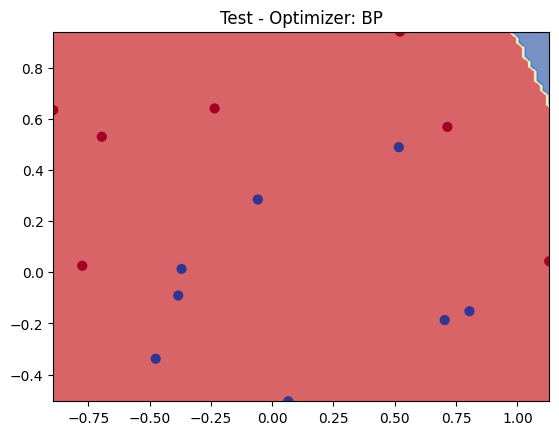

(0.4666666666666667, 8.226639)

In [15]:
# Circles dataset
bp = GAESMLP(model, 'BP', learning_rate=0.5, momentum=0.9, nesterov=True, save_dir='results/bp_circles')
bp.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_circles['y_val'], X_test=df_circles['X_test'], y_test=df_circles['y_test'], verbose=True, iterations = 3000)
bp.evaluate(df_circles['X_test'], df_circles['y_test'], verbose = 'Test')

Los experimentos con los parametros especificados para cada metodo distinto de optimizacion fueron ejecutados 10 veces cada uno, y 